## 탐색적 데이터 분석
* 데이터의 정보를 파악하며 문제 해결에 필요한 힌트를 분석하는 과정

### 데이터 첫만남
* 데이터의 출처와 주제 이해
* 데이터 크기 알아보기
* 데이터 구성요소(feature) 살펴보기

### 데이터 속성 탐색하기
* feature 속성 탐색
* feature간 상관관계

### 탐색 데이터 시각화

In [2]:
# -*- coding : utf-8 -*-

In [3]:
# 치폴레 토이 data

In [3]:
# step 1 
# 탐색 : 데이터의 기초 정보 살펴보기
import pandas as pd 

file_path = "python-data-analysis-master\data\chipotle.tsv"
chipo = pd.read_csv(file_path, sep='\t')

In [4]:
print(chipo.shape)
print("------------------------")
print(chipo.info())

(4622, 5)
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [5]:
# column num 4 has null value (4622 - 3376 = 1246)
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [8]:
print(chipo.columns)
print("---------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
---------------------------
RangeIndex(start=0, stop=4622, step=1)


In [9]:
# order_id : 주문번호
# quantilty : 아이템 주문 수량
# item_name : 주문한 아이템 이름
# choice_description : 주문한 아이템의 상세 선택 옵션
# item_price : 주문 아이템의 가격 정보

In [10]:
# describe() : 기초통계량

# oder_id는 숫자의 의미를 가지지 않기 때문에 str로 변환
chipo['order_id'] = chipo['order_id'].astype('str')

In [12]:
print(chipo.describe())  # only quantity is numeric feature 

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [15]:
# oder_id and item_name count
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


In [16]:
# step 2 
# 인사이트 발견 : 탐색과 시각화하기

In [17]:
# the most top 10 item
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("TOP", idx, ":", val, cnt)

TOP 1 : Chicken Bowl 726
TOP 2 : Chicken Burrito 553
TOP 3 : Chips and Guacamole 479
TOP 4 : Steak Burrito 368
TOP 5 : Canned Soft Drink 301
TOP 6 : Chips 211
TOP 7 : Steak Bowl 211
TOP 8 : Bottled Water 162
TOP 9 : Chicken Soft Tacos 115
TOP 10 : Chips and Fresh Tomato Salsa 110


In [29]:
# 아이템별 주문 개수와 총량
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]  # 아이템별 주문 개수 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [30]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()  # 아이템별 주문 총량
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

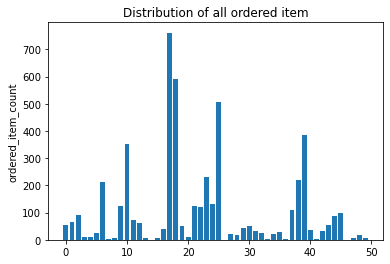

In [32]:
# 시각화
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [41]:
# step 3
# 데이터 전처리 : 전처리 함수 사용하기
# item_price -> 문자열 데이터

print(chipo.info())
print("---------------------")
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
---------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [42]:
# $문자 제거
# column 단위 데이터에 apply() 함수로 전처리 적용
# apply : 시리즈 단위의 연산 처리 
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [43]:
# step 4
# 탐색적 분석 : 스무고개로 개념적 탐색 분석하기 

In [44]:
# 주문당 평균 계산금액 출력하기
chipo.groupby('order_id')['item_price'].sum().mean()   
# 한 사람이 약 18달러 가량의 주문을 할 것

18.811428571428717

In [45]:
# 한 주문에 10달러 이상 지불한 주문 번호
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

In [46]:
print(results[:10])

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40


In [53]:
print(results.index)
print("---------------")
print(results.values)

Index(['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005',
       '1006',
       ...
       '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
      dtype='object', name='order_id', length=1834)
---------------
[[ 4.   11.56]
 [ 2.   13.2 ]
 [ 2.   10.08]
 ...
 [ 2.   22.5 ]
 [ 2.   10.88]
 [ 5.   29.25]]


In [55]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [60]:
# 각 아이템 가격 구하기
chipo_one_item  = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()

In [63]:
price_per_item.sort_values(by = 'item_price', ascending=False).head()

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99


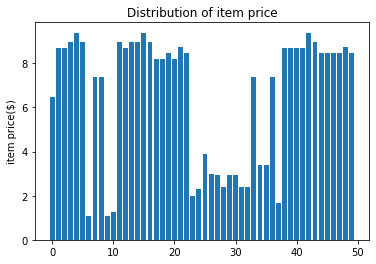

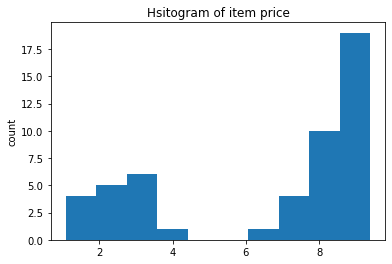

In [64]:
# 아이템 가격 분포 그래프
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

plt.hist(item_price)
plt.ylabel('count')
plt.title('Hsitogram of item price')
plt.show()

In [65]:
# 가장 비싼 주문에서 아이템 총 몇 개
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]
# 가장 비싼 주문에서 23개 아이템 주문

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [66]:
# 'vaggie salad bowl'이 몇번 주문되었는지 계산
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]

In [68]:
# 한 주문 내에서 중복 집계된 item_name 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

In [72]:
print(len(chipo_salad))
print('--------------')
chipo_salad.head()

18
--------------


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [75]:
# 'Chicken Bowl'을 2개 이상 주문한 주문 횟수
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >=2]
print(chipo_chicken_result.shape[0])
chipo_chicken_result.head()

33


,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50


In [77]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [100]:
# 가장 많이 주문된 아이템
chipo_most_item = chipo.groupby('item_name')['quantity'].count()
chipo_most_item = chipo_most_item.sort_values(ascending=False)
chipo_most_item.head(1)
# chicken bowl이 가장 많이 팔림 (726개)

item_name
Chicken Bowl    726
Name: quantity, dtype: int64

In [94]:
# 주문된 전체 아이템 종류
chipo_item = chipo.groupby('item_name')['order_id'].count()
print(len(chipo_item), "개")
print("-------------------")
print(chipo_item.index.tolist()[:10])

50 개
-------------------
['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda']


In [111]:
# 주문당 평균 계산 금액
chipo_order_group = chipo.groupby('order_id')['item_price'].sum()  
# 주문별 합계 중요!!!!!
chipo_order_group = chipo_order_group.sort_values(ascending=False)
print(chipo_order_group.head())
print("-----------------------")
print(chipo_order_group.describe())

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
Name: item_price, dtype: float64
-----------------------
count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64


In [117]:
# 각 아이템의 대략적인 가격
chipo_item_price = chipo[chipo['quantity'] == 1]
chipo_item_price = chipo_item_price.groupby('item_name')['item_price'].mean()
chipo_item_price = chipo_item_price.sort_values(ascending = False)
chipo_item_price.head()

item_name
Carnitas Salad Bowl    11.056667
Steak Salad Bowl       10.964074
Barbacoa Salad Bowl    10.640000
Carnitas Bowl          10.272121
Steak Bowl             10.230891
Name: item_price, dtype: float64

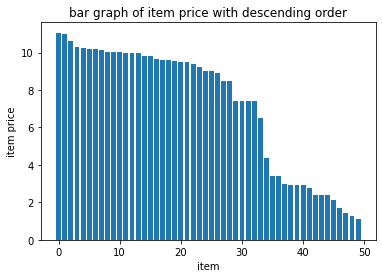

In [124]:
item = chipo_item_price.index.tolist()
x_pos = np.arange(len(item))

plt.bar(x_pos, chipo_item_price.values, align='center')
plt.xlabel("item")
plt.ylabel("item price")
plt.title("bar graph of item price with descending order")

plt.show()

In [ ]:
# github 올리기